In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
os.listdir("../Scikitlearn/Decision Trees")

['.ipynb_checkpoints', 'Stage 1.ipynb', 'Untitled.ipynb', 'weatherAUS.csv']

In [3]:
raw_df = pd.read_csv("../Scikitlearn/Decision Trees/weatherAUS.csv")
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
raw_df[raw_df.duplicated]

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]

In [6]:
raw_df.dropna(subset=["RainTomorrow"], inplace=True)

In [7]:
year = pd.to_datetime(raw_df.Date).dt.year

In [8]:
train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [9]:
train_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
input_cols = train_df.columns[1:-1].tolist()
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [11]:
target_col = 'RainTomorrow'

In [12]:
train_inputs = train_df[input_cols].copy()
test_inputs = test_df[input_cols].copy()
val_inputs = val_df[input_cols].copy()

In [13]:
numeric_cols = train_inputs.select_dtypes(np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes("object").columns.tolist()

In [14]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [15]:
raw_df[numeric_cols].isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imputer = SimpleImputer(strategy="mean").fit(raw_df[numeric_cols])

In [18]:
train_inputs.loc[:, numeric_cols] = imputer.transform(train_inputs[numeric_cols])

In [19]:
val_inputs.loc[:, numeric_cols] = imputer.transform(val_inputs[numeric_cols])

In [20]:
test_inputs.loc[:, numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [23]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])

In [24]:
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [25]:
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [26]:
val_inputs.describe().loc[["max", "min"]]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
max  0.952830  0.948960  0.666307     0.485517       1.0       1.000000   
min  0.007075  0.030246  0.000000     0.000000       0.0       0.007752   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
max      0.669231      0.850575         1.00          1.0     0.971901   
min      0.000000      0.000000         0.04          0.0     0.125620   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
max       0.9632  0.888889  0.888889  0.943038  0.925144  
min       0.0816  0.000000  0.000000  0.021097  0.026871

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore").fit(raw_df[categorical_cols])

In [29]:
encoded_cols = encoder.get_feature_names_out().tolist()
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [30]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_17616\1875270495.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_17616\1875270495.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_17616\1875270495.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is u

In [31]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_17616\474139323.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_17616\474139323.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_17616\474139323.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

In [32]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_17616\922123976.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_17616\922123976.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_17616\922123976.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

In [33]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [34]:
train_targets = train_df[target_col]
val_targets = val_df[target_col]
test_targets = test_df[target_col]

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [37]:
train_preds = model.predict(X_train)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(train_targets, train_preds)

0.9999797955307714

In [40]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

In [41]:
model.score(X_test, test_targets)

0.7741202741202741

In [42]:
model.score(X_val, val_targets)

0.7921188555510418

In [43]:
from sklearn.tree import plot_tree, export_text

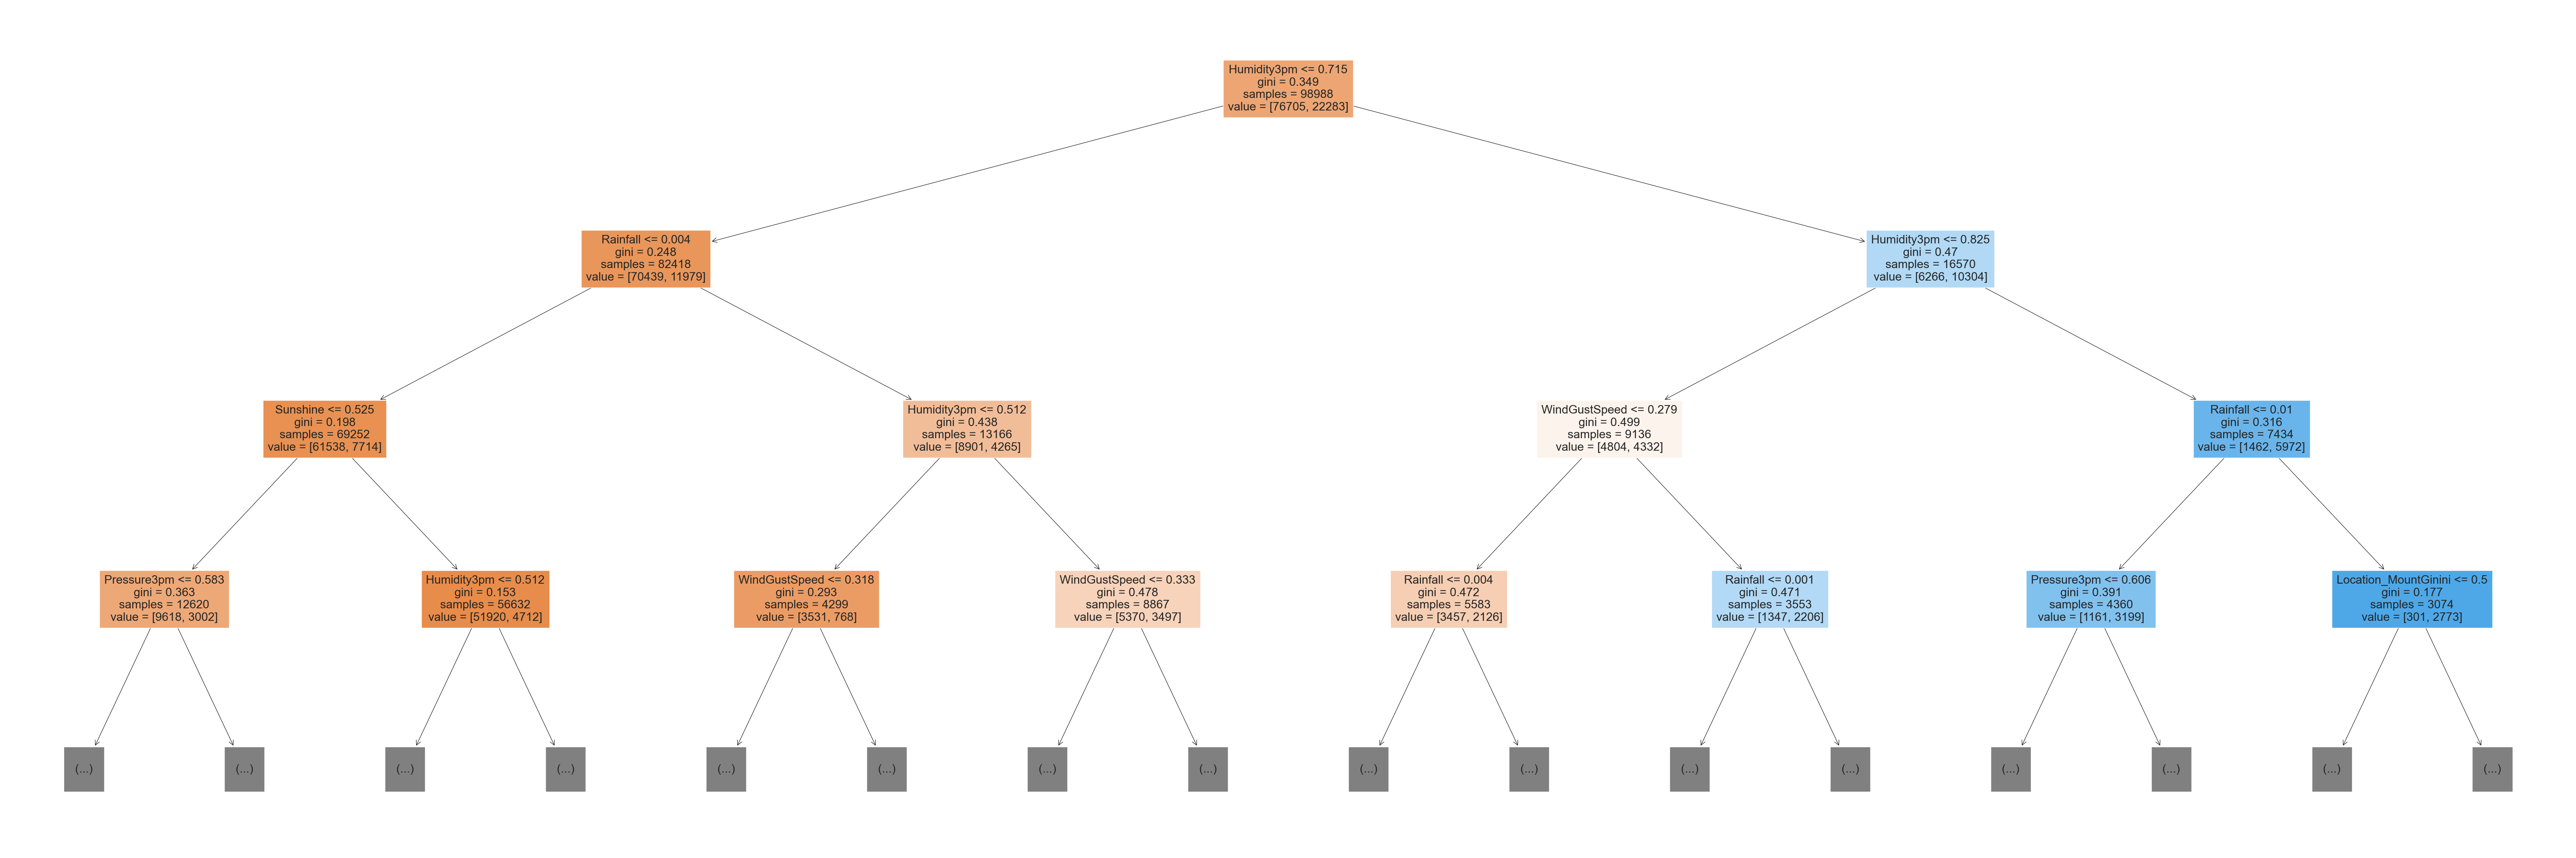

In [44]:
plt.figure(figsize=(90, 30))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True)
plt.show()

In [45]:
tree_text = export_text(model, max_depth=10, feature_names=X_train.columns.tolist())

In [46]:
print(tree_text[:2000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

## Checking Feature Importances

In [47]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [48]:
importances_df = pd.DataFrame({"name": X_train.columns.tolist(), "importances": model.feature_importances_}).sort_values("importances", ascending=False)

<Axes: xlabel='importances', ylabel='name'>

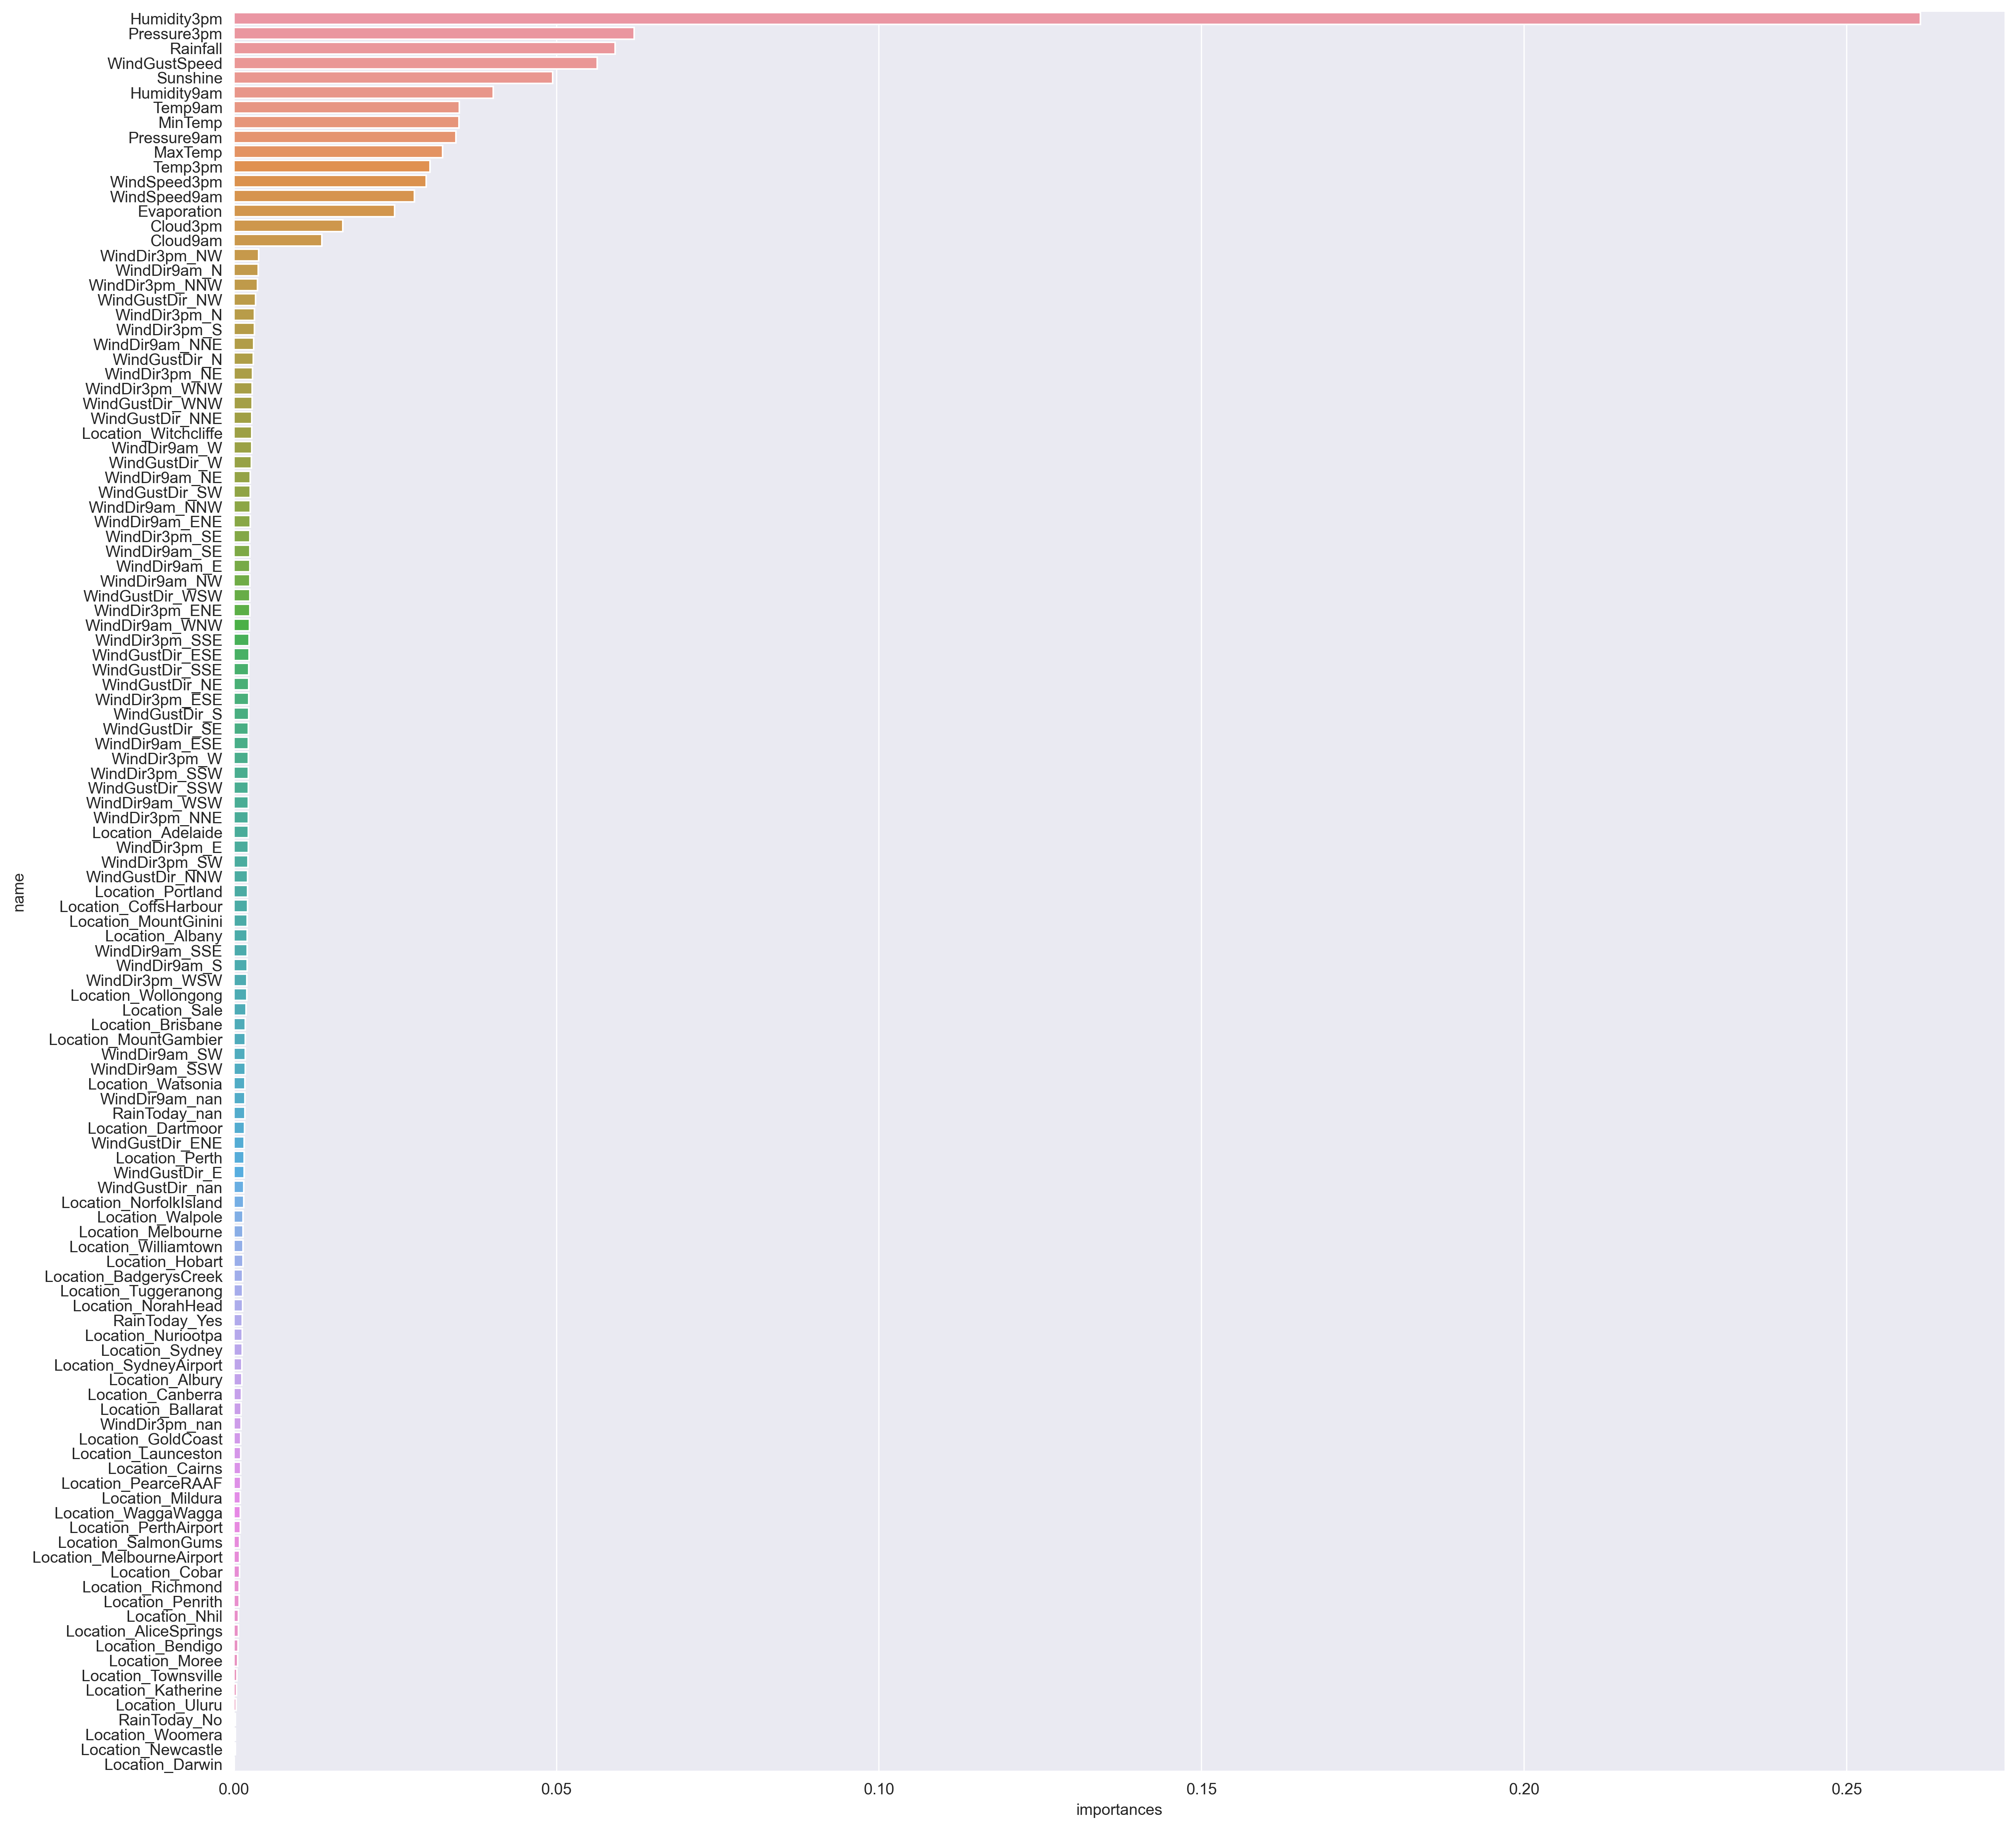

In [49]:
plt.figure(figsize=(20, 20), dpi=300)
sns.barplot(importances_df, y="name", x="importances")

## Hyperparameter Tuning and Overfitting
### Regularization

1. Max_depth
2. Max_leaf_nodes

In [50]:
model = DecisionTreeClassifier(max_depth=3, random_state=43).fit(X_train, train_targets)

In [51]:
model.tree_.max_depth

3

In [52]:
model.score(X_train, train_targets)

0.8291308037337859

In [53]:
model.score(X_train, train_targets)

0.8291308037337859

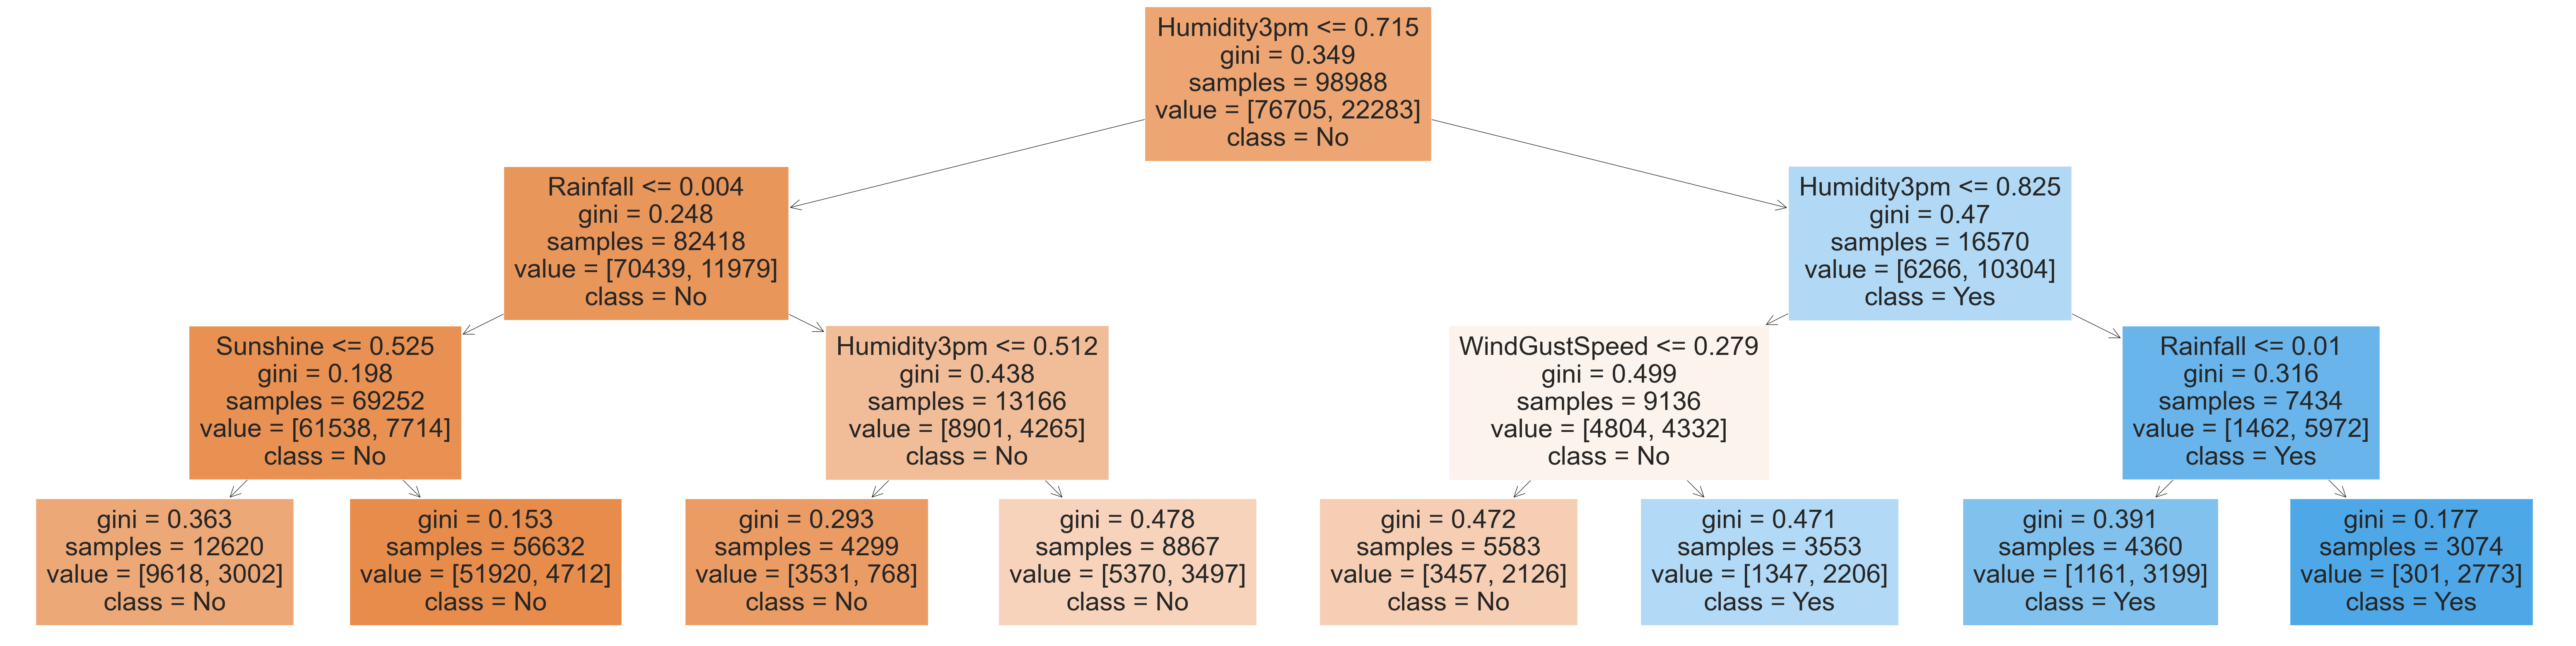

In [58]:
plt.figure(figsize=(80, 20))
plot_tree(model, class_names=model.classes_, feature_names=X_train.columns, filled=True);

In [73]:
def max_depth_error(max_d):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, train_targets)
    
    train_accuracy = model.score(X_train, train_targets)
    val_accuracy = model.score(X_val, val_targets)
    
    train_error = 1 - train_accuracy
    val_error = 1- val_accuracy
    
    train_accuracy = model.score(X_val, val_targets)
    errors_df = dict(Max_Depth = max_d, Training_Error = train_error, Validation_Error= val_error)
    return errors_df


In [74]:
errors_dataframe = pd.DataFrame([max_depth_error(i) for i in list(range(1, 30))])

<Axes: xlabel='Max_Depth', ylabel='Training_Error'>

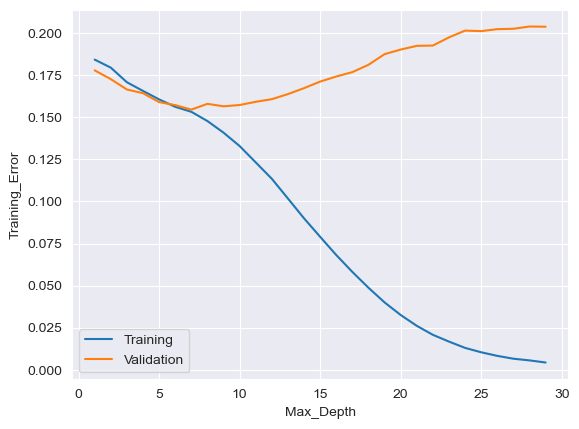

In [81]:
fig, ax = plt.subplots()

sns.lineplot(x=errors_dataframe['Max_Depth'], ax=ax, y=errors_dataframe["Training_Error"], label="Training")
sns.lineplot(x=errors_dataframe['Max_Depth'], y=errors_dataframe["Validation_Error"], label="Validation")

In [91]:
model = DecisionTreeClassifier(random_state=43, max_depth=7)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=7, random_state=43)

In [92]:
model.score(X_train, train_targets)

0.8466884874934335

In [ ]:
model.score(X_val, val_targets)

### max_leaf_nodes

In [95]:
model = DecisionTreeClassifier(random_state=42, max_leaf_nodes=128)

In [96]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [98]:
model.score(X_train, train_targets)

0.8480421869317493

In [99]:
model.score(X_val, val_targets)

0.8442342290058615

In [97]:
model.tree_.max_depth

12

In [103]:
print(export_text(model, feature_names=X_train.columns.tolist())[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

### Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
model = RandomForestClassifier(n_jobs=-1, random_state=43)
# n_jobs 

In [124]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=43)

In [125]:
model.score(X_train, train_targets)

0.9999696932961571

In [126]:
model.score(X_val, val_targets)

0.8568858452788579

In [127]:
model.score(X_test, test_targets)

0.8441903441903442

In [118]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [128]:
model.predict_proba(X_train)

array([[0.98, 0.02],
       [0.99, 0.01],
       [0.98, 0.02],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.92, 0.08]])

In [130]:
len(model.estimators_)

100

In [135]:
modA = model.estimators_[0].fit(X_train, train_targets)
modA.score(X_train, train_targets)
modA.score(X_val, val_targets)

0.7863733967848645

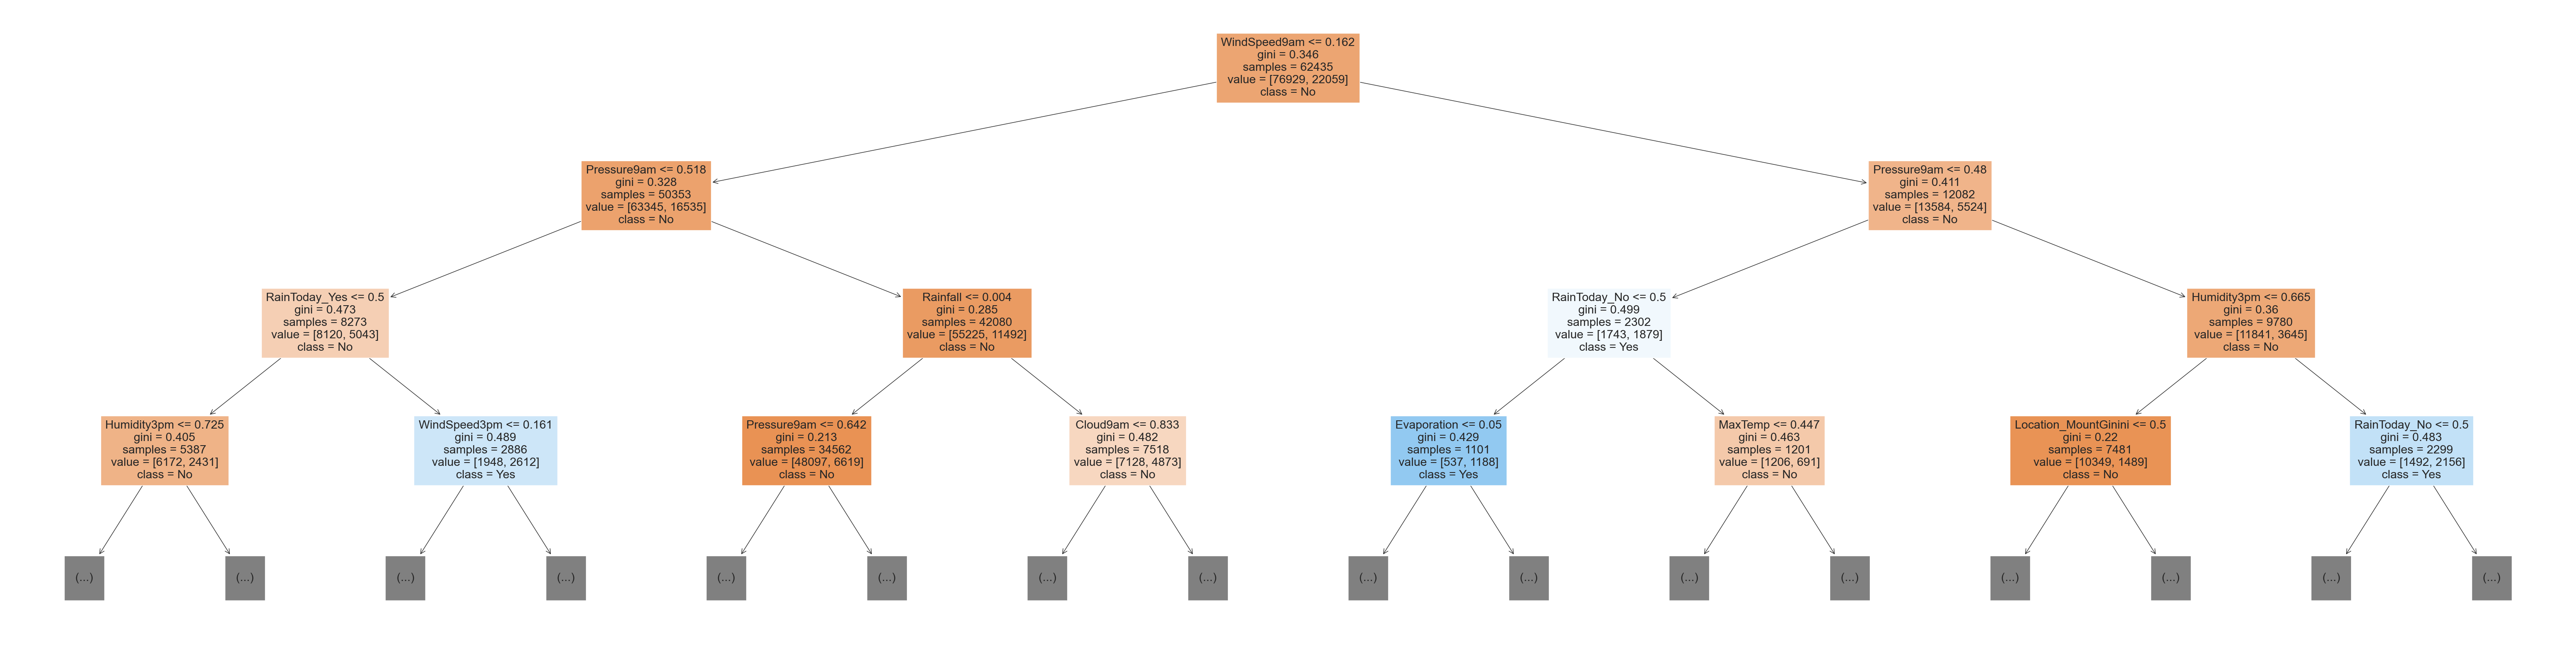

In [138]:
plt.figure(figsize=(80, 20))
plot_tree(model.estimators_[20], filled=True, max_depth=3, feature_names=X_train.columns.tolist(), class_names=model.classes_)
plt.show()

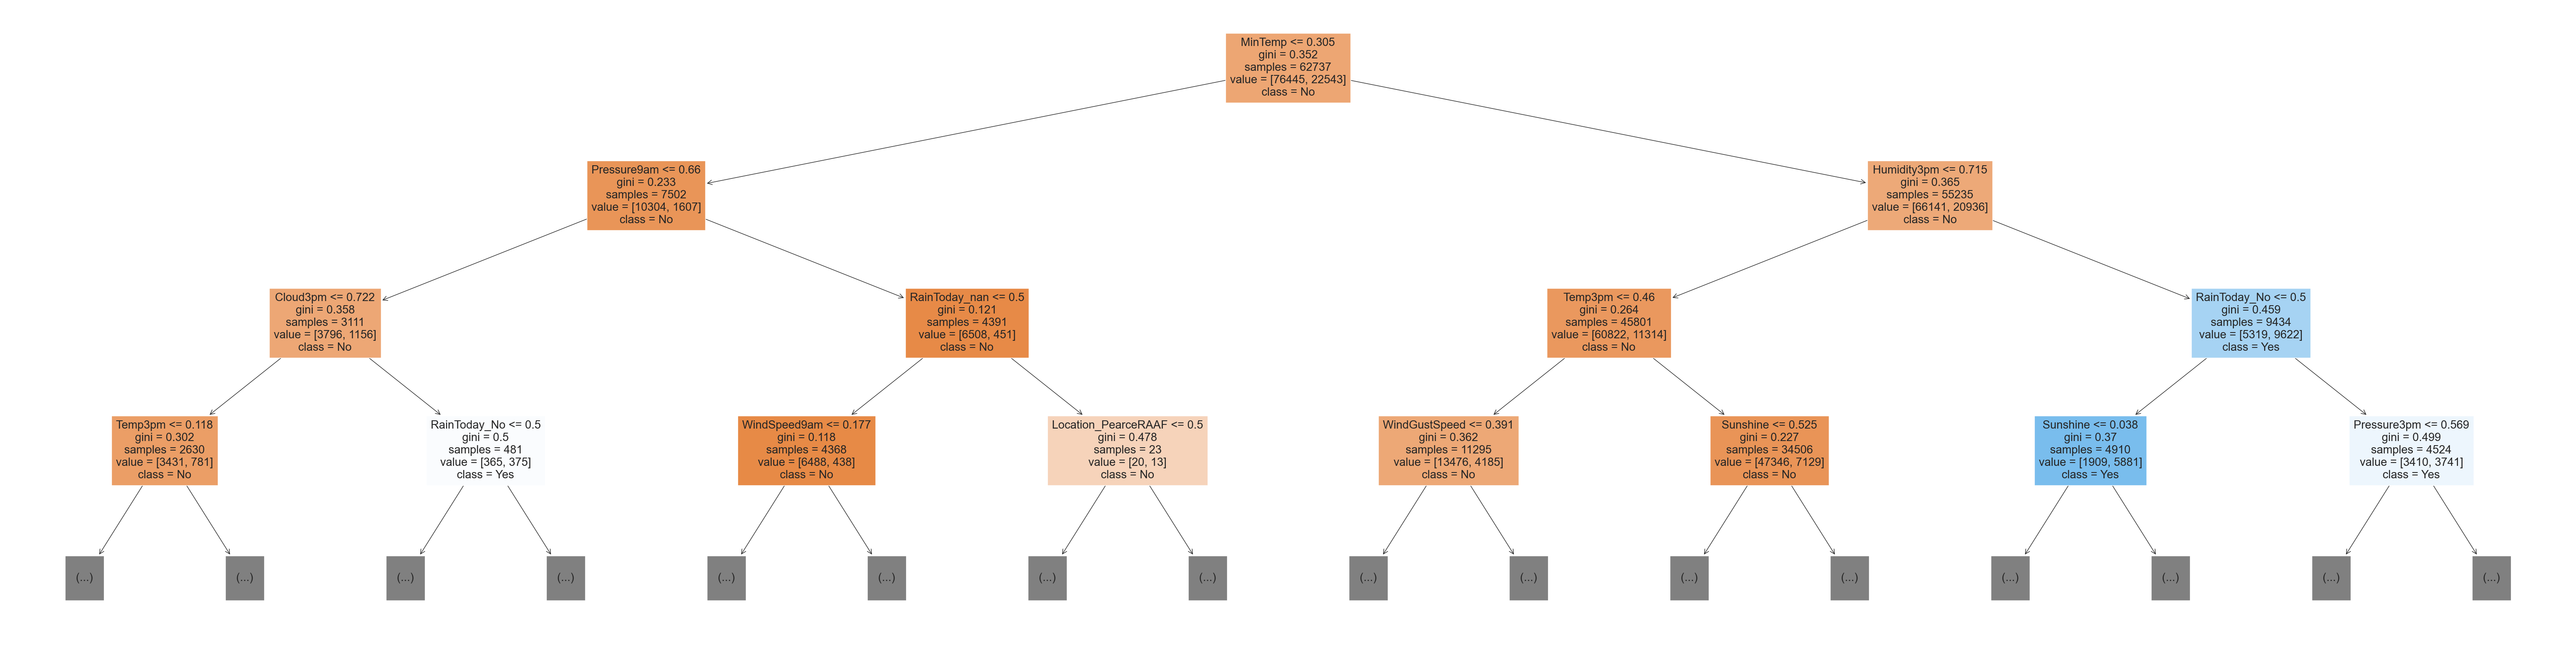

In [139]:
plt.figure(figsize=(80, 20))
plot_tree(model.estimators_[10], filled=True, max_depth=3, feature_names=X_train.columns.tolist(), class_names=model.classes_)
plt.show()

In [140]:
model.feature_importances_

array([0.04126706, 0.04199527, 0.0572315 , 0.02485414, 0.0551648 ,
       0.04818225, 0.02807211, 0.03099624, 0.04908037, 0.1315574 ,
       0.05028355, 0.05205258, 0.02334384, 0.03702731, 0.03947803,
       0.04493168, 0.00159436, 0.00173739, 0.00136909, 0.00066127,
       0.00135785, 0.00135844, 0.00123622, 0.00138251, 0.0010692 ,
       0.00165979, 0.00092911, 0.00188484, 0.00148638, 0.00069794,
       0.00118362, 0.0016293 , 0.00032643, 0.00142126, 0.00136039,
       0.00134239, 0.00094724, 0.0009433 , 0.00166388, 0.00123607,
       0.0007895 , 0.00054379, 0.00156259, 0.00171316, 0.00131728,
       0.00122111, 0.00096557, 0.00159684, 0.00129191, 0.00198996,
       0.00122016, 0.00157466, 0.00115241, 0.00176754, 0.00145872,
       0.00072594, 0.00139934, 0.00024246, 0.00122015, 0.00190421,
       0.00138095, 0.00164915, 0.0025079 , 0.00168269, 0.00084312,
       0.00225044, 0.00211079, 0.00207832, 0.00336025, 0.00261394,
       0.00263953, 0.00307165, 0.00340068, 0.00300968, 0.00267

In [143]:
importances_df = pd.DataFrame({
    "feature": X_train.columns.tolist(),
    "importances": model.feature_importances_
}).sort_values("importances", ascending=False)

In [147]:
plt.figure(figsize=(30, 30), dpi=500)
sns.barplot(importances_df, x="importances", y="feature")

<Axes: xlabel='importances', ylabel='feature'>

### Hyperparamer Tuning

In [148]:
modelB = RandomForestClassifier(n_jobs=-1, random_state=43).fit(X_train, train_targets)

In [151]:
modelB_acc = modelB.score(X_train, train_targets)
modelB_val_acc = modelB.score(X_val, val_targets)

In [152]:
modelB_acc,modelB_val_acc

(0.9999696932961571, 0.8568858452788579)

### n_estimators

In [153]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)
# Randomness helps reduce overfitting

In [154]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [155]:
model.score(X_train, train_targets)

0.986958015112943

In [156]:
model.score(X_val, val_targets)

0.8485868492832686

In [ ]:
modelB_val_acc

In [157]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=300)

In [158]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [159]:
model.score(X_train, train_targets)

0.9999797955307714

In [160]:
model.score(X_val, val_targets)

0.8573501247751146

In [162]:
def model_n_estimators(n):
    model = RandomForestClassifier(n_jobs=-1, random_state=43, n_estimators=n).fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return dict(train_acc=train_acc, val_acc=val_acc)

In [168]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [169]:
test_params(max_depth=200)

(0.9999494888269285, 0.8566537055307295)

### max_depth and max_leaf_nodes

In [175]:
model.estimators_[100].tree_.max_depth

49

In [177]:
test_df = [test_params(max_depth=i) for i in list(range(2, 50))]

In [182]:
t_df = pd.DataFrame(test_df, columns=["train_acc", "val_acc"])

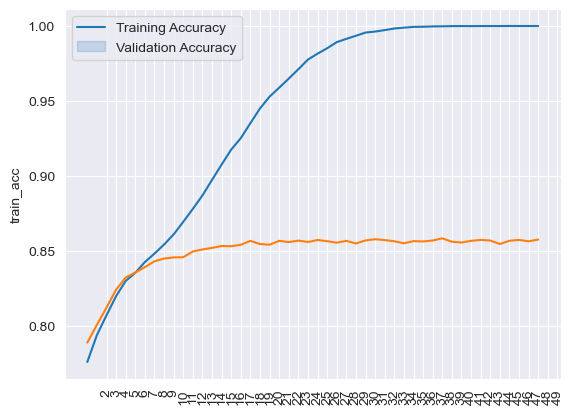

In [190]:
sns.lineplot(t_df["train_acc"])
sns.lineplot(t_df["val_acc"])
plt.xticks(list(range(2, 50)), rotation=90)
plt.legend(["Training Accuracy", "Validation Accuracy"]);

In [196]:
test_params(max_depth=17)

(0.917565765547339, 0.8530555394347397)

### max_features

In [204]:
test_params(max_features="log2")

(0.9999595910615429, 0.8558992513493123)

In [ ]:
test_params(max_features=30)

#### min_samples_split and min _samples_leaf

In [206]:
test_params(min_samples_leaf=10, min_samples_split=4)
# (0.8782781751323393, 0.8517787708200336)

(0.8782781751323393, 0.8517787708200336)

In [ ]:
test_params(min_samples_leaf=10, min_samples_split=2)

### min_impurity_decrease

In [208]:
test_params(min_impurity_decrease=1e-7)

(0.9996060128500425, 0.8561313910974406)

In [210]:
test_params(min_impurity_decrease=1e-8)

(0.9999595910615429, 0.8567697754047937)

### bootstrap
default=True

In [211]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [212]:
test_params(bootstrap=True)

(0.9999494888269285, 0.8566537055307295)

### max_samples 
#### Size of each bootstrap

In [213]:
test_params(max_samples=0.3)

(0.9244554895542894, 0.8559572862863444)

In [214]:
test_params(max_samples=0.9)

(0.9997676486038711, 0.8565376356566653)

In [216]:
test_params(max_samples=0.7)

(0.9949286782236231, 0.8555510417271197)

### class_weight

In [217]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [222]:
train_targets.value_counts() / len(train_targets)
# Give hgher weightage to classes

No     0.774892
Yes    0.225108
Name: RainTomorrow, dtype: float64

In [226]:
test_params(class_weight={"No": 2, "Yes": 1}) # or use balanced
# len(val with No) / 2 - len(Val with no) ~

(0.9999292843576999, 0.8560153212233764)

In [224]:
test_params(class_weight={"No": 1, "Yes": 2})

(0.9999595910615429, 0.8558412164122802)

In [225]:
test_params(class_weight="balanced")

(0.9999595910615429, 0.8553769369160235)

In [228]:
model = RandomForestClassifier(n_jobs=-1, max_depth=17, n_estimators=300,
                               min_impurity_decrease=1e-6, max_features="sqrt",
                                class_weight={"No": 1, "Yes": 1.5})

In [229]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=17,
                       min_impurity_decrease=1e-06, n_estimators=300,
                       n_jobs=-1)

In [230]:
model.score(X_train, train_targets)

0.9238190487735887

In [231]:
model.score(X_val, val_targets)

0.8563054959085369